## CSE0602 Lab Assignment-4
## Building a CNN model for Image Classification using CIFAR-10 dataset.

## Vivek Sharma  | Reg. No.- 23MSD7013

### Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10

# Split into training and testing sets
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [3]:
# Check the shape of the data
print("Training data shape:", trainX.shape)
print("Test data shape:", testX.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


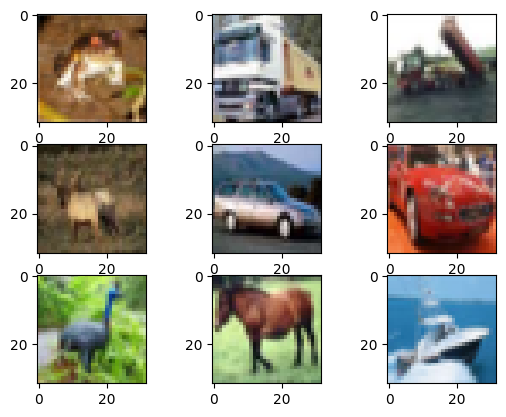

In [4]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i])
# show the figure
plt.show()

In [5]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [6]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [7]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [8]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [9]:
# # define cnn model
# def define_model():
#     model = Sequential()
#     # ...
#     return model

In [10]:
# fit model
# history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

In [11]:
# evaluate model
# _, acc = model.evaluate(testX, testY, verbose=0)

In [12]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()

In [13]:
# print('> %.3f' % (acc * 100.0))

In [14]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # Save the entire model to a file after training
    model.save('baseline_model.h5')    

### Developing a Baseline Model

In [15]:
# # example of a 3-block vgg style architecture
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))

In [16]:
# # example output part of the model
# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(10, activation='softmax'))

In [17]:
# # compile model
# opt = SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Baseline Model: VGG Block

In [18]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model1 = define_model()
model1.summary()

C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 34ms/step - accuracy: 0.3291 - loss: 1.8565 - val_accuracy: 0.5034 - val_loss: 1.3992
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.5320 - loss: 1.3124 - val_accuracy: 0.5912 - val_loss: 1.1503
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6189 - loss: 1.0770 - val_accuracy: 0.6200 - val_loss: 1.0749
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6748 - loss: 0.9325 - val_accuracy: 0.6656 - val_loss: 0.9473
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7158 - loss: 0.8116 - val_accuracy: 0.7061 - val_loss: 0.8590
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.7505 - loss: 0.7110 - val_accuracy: 0.7133 - val_loss: 0.8345
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7738 - loss: 0.6469 - val_accuracy: 0.7203 - val_loss: 0.8240
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8028 -

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9922 - loss: 0.0229 - val_accuracy: 0.7353 - val_loss: 2.2049
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7382 - loss: 2.1907
> 73.530


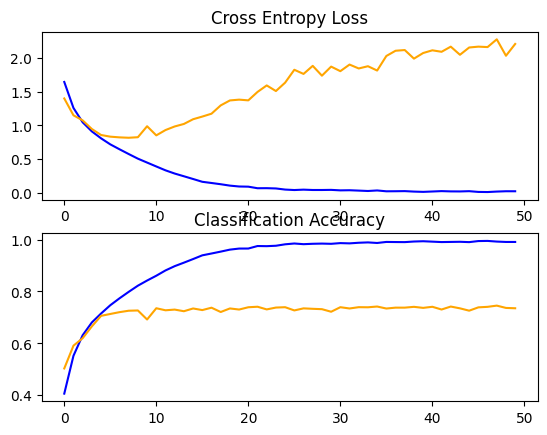

In [20]:
run_test_harness()

In [27]:
# run the test harness for evaluating a model
def run_test_harness3():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # load model
    model = load_model('baseline_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [29]:
 # entry point, run the test harness
run_test_harness3()

> 73.530


### Improved Model with Regularization and Data Augmentation

In [30]:
# define cnn model
def define_model2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [31]:
model2 = define_model2()
model2.summary()

C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [32]:
# # run the test harness for evaluating a model
# def run_test_harness2():
#     # load dataset
#     trainX, trainY, testX, testY = load_dataset()
#     # prepare pixel data
#     trainX, testX = prep_pixels(trainX, testX)
#     # define model
#     model = define_model2()
#     # create data generator
#     datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
#     it_train = datagen.flow(trainX, trainY, batch_size=64)
#     steps = math.ceil(trainX.shape[0] / 64)
    
#     # EarlyStopping and ModelCheckpoint
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#     model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
#     # fit model with callbacks
#     history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1,
#                                   callbacks=[early_stopping, model_checkpoint])
    
#     # evaluate model
#     _, acc = model.evaluate(testX, testY, verbose=1)
#     print('> %.3f' % (acc * 100.0))
#     # learning curves
#     summarize_diagnostics(history)

In [33]:
def run_test_harness2():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model2()
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # Save the entire model to a file after training
    model.save('improved_model.h5')

Epoch 1/100


C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 108s 132ms/step - accuracy: 0.2417 - loss: 2.5180 - val_accuracy: 0.4680 - val_loss: 1.4603
Epoch 2/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:35 122ms/step - accuracy: 0.5000 - loss: 1.5359

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5000 - loss: 1.5359 - val_accuracy: 0.4681 - val_loss: 1.4592
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.3966 - loss: 1.6690 - val_accuracy: 0.4492 - val_loss: 1.5364
Epoch 4/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3125 - loss: 1.6195 - val_accuracy: 0.4470 - val_loss: 1.5433
Epoch 5/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.4462 - loss: 1.5076 - val_accuracy: 0.4707 - val_loss: 1.4614
Epoch 6/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4531 - loss: 1.4933 - val_accuracy: 0.4689 - val_loss: 1.4696
Epoch 7/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 107s 136ms/step - accuracy: 0.4837 - loss: 1.4283 - val_accuracy: 0.5005 - val_loss: 1.3558
Epoch 8/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5000 - loss: 1.4854 - val_accuracy: 0.5007 - val_loss: 1.3573
Epoch 9/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.4964 - loss: 1.3812 - val_

781/781 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.6893 - loss: 0.8857 - val_accuracy: 0.6842 - val_loss: 0.9056
Epoch 52/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7031 - loss: 0.7363 - val_accuracy: 0.6818 - val_loss: 0.9114
Epoch 53/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - accuracy: 0.6979 - loss: 0.8688 - val_accuracy: 0.7036 - val_loss: 0.8379
Epoch 54/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7188 - loss: 0.7916 - val_accuracy: 0.7049 - val_loss: 0.8349
Epoch 55/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.6992 - loss: 0.8654 - val_accuracy: 0.6984 - val_loss: 0.8693
Epoch 56/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6562 - loss: 0.8871 - val_accuracy: 0.6987 - val_loss: 0.8705
Epoch 57/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.7051 - loss: 0.8411 - val_accuracy: 0.7120 - val_loss: 0.8245
Epoch 58/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6250 - loss: 0.9753

781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8750 - loss: 0.6145 - val_accuracy: 0.7427 - val_loss: 0.7475
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7483 - loss: 0.7419
> 74.270


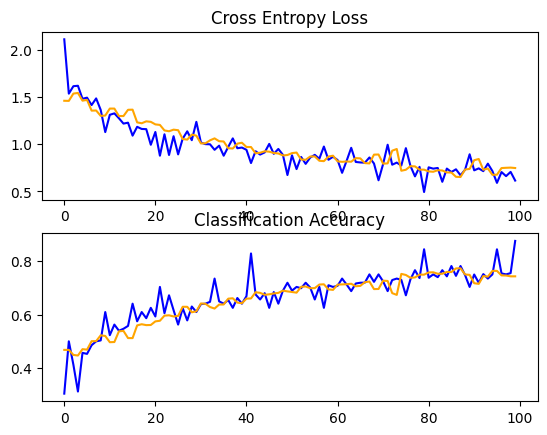

In [34]:
# entry point, run the test harness
run_test_harness2()

### Finalizing the improved model and evaluating

In [35]:
# run the test harness for evaluating a model
def run_test_harness4():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # load model
    model = load_model('improved_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [36]:
run_test_harness4()

> 74.270


### Classification Report

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to generate classification report
def generate_classification_report(model, testX, testY):
    # Predict classes for the test set
    predictions = model.predict(testX)
    
    # Convert predictions and test labels back from one-hot encoding
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(testY, axis=1)
    
    # Generate classification report
    report = classification_report(true_classes, predicted_classes, target_names=[
        'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
    ])
    print("Classification Report:\n", report)

In [42]:
# Function to load dataset, preprocess, and load model
def load_and_prepare_data_and_model():
    # Load dataset
    trainX, trainY, testX, testY = load_dataset()
    # Prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # Load trained model
    model = load_model('improved_model.h5')
    
    return model, testX, testY

In [43]:
model, testX, testY = load_and_prepare_data_and_model()

In [44]:
# Generate classification report
generate_classification_report(model, testX, testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.87      0.62      0.73      1000
  automobile       0.88      0.90      0.89      1000
        bird       0.64      0.64      0.64      1000
         cat       0.57      0.61      0.59      1000
        deer       0.75      0.64      0.69      1000
         dog       0.78      0.53      0.63      1000
        frog       0.56      0.95      0.70      1000
       horse       0.90      0.75      0.82      1000
        ship       0.84      0.89      0.86      1000
       truck       0.85      0.89      0.87      1000

    accuracy                           0.74     10000
   macro avg       0.76      0.74      0.74     10000
weighted avg       0.76      0.74      0.74     10000



### Confusion Matrix Plot

In [45]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, testX, testY):
    # Predict classes for the test set
    predictions = model.predict(testX)
    
    # Convert predictions and test labels back from one-hot encoding
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(testY, axis=1)
    
    # Generate confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
        'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
    ], yticklabels=[
        'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
    ])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


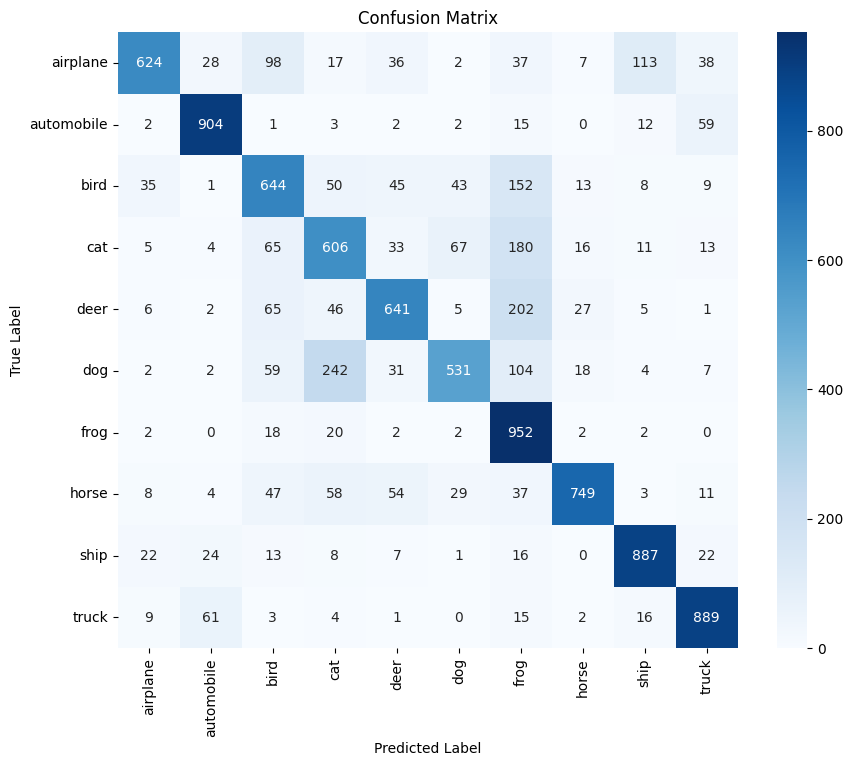

In [46]:
# Plot confusion matrix
plot_confusion_matrix(model, testX, testY)

### Visualize Predictions

In [47]:
import random

# Function to visualize predictions
def visualize_predictions(model, testX, testY, num_images=5):
    # Convert one-hot encoded labels to integers
    true_classes = np.argmax(testY, axis=1)
    
    # Predict classes for the test set
    predictions = model.predict(testX)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Get class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    # Select random indices from the test set
    indices = random.sample(range(testX.shape[0]), num_images)
    
    # Plot selected images with their predicted and true labels
    plt.figure(figsize=(15, 5))
    
    for i, index in enumerate(indices):
        # Get the image, predicted label, and true label
        img = testX[index]
        pred_label = predicted_classes[index]
        true_label = true_classes[index]
        
        # Plot the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
        plt.axis('off')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


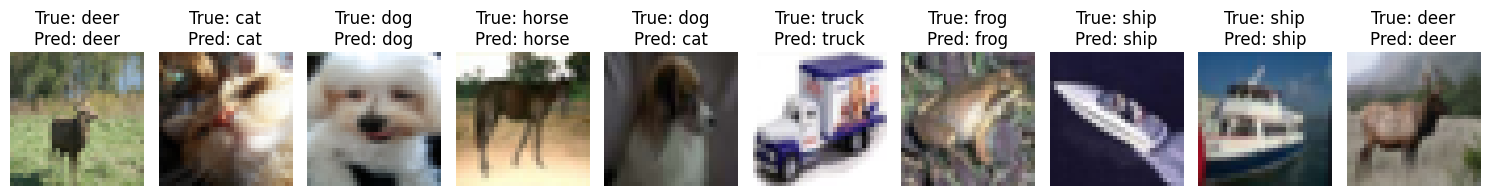

In [49]:
# Usage of the function to visualize predictions
visualize_predictions(model, testX, testY, num_images=10)

## 1. CNN Architecture
### What layers did you choose in your CNN architecture and why?

### How does each layer (Convolutional, Pooling, Dense, etc.) contribute to the classification task?

## 2. Model Training
### How does data augmentation affect the performance of your CNN model?

### How did you tune hyperparameters (e.g., learning rate, number of filters, kernel size, etc.) for better performance?

## 3. Evaluation
### Analyze the confusion matrix. Which classes were misclassified the most? Why do you think this happened?

### Discuss the model's overall accuracy and its performance on individual classes.

### How would you improve the model's performance?

## 4. Further Improvements
### Suggest at least two modifications to the model architecture or training process to improve the accuracy further. Justify your suggestions.